# Introduction

Use this simple notebook to explore different functions that define search spaces. 

In [1]:
from hyperopt import hp, fmin, tpe, rand, Trials, STATUS_OK, pyll
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define a simple objective function. For a machine learning model, this will relate to the metrics we want to optimize
def f(x):
    return {'loss': x,
            'status': STATUS_OK}

# Run hyperopt tunning with random search
trials_rand = Trials()
result_rand = fmin(
    fn = f,                              # objective function
    space = hp.loguniform('x', -5, 3),   # parameter space
    algo = rand.suggest,                 # random search algorithm
    max_evals = 500,                     # no. of evaluations
    trials = trials_rand                 # trial object that keeps track of the results
)

x = trials_rand.vals['x']

  0%|          | 0/500 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 500/500 [00:00<00:00, 1216.16trial/s, best loss: 0.00677646313728146] 


In [3]:
# Calculate basic statistics
mean = np.mean(x)
minimum = np.min(x)
q25 = np.percentile(x, 25)
median = np.median(x)
q75 = np.percentile(x, 75)
maximum = np.max(x)

# Print the calculated statistics
print("Mean:", mean)
print("Minimum:", minimum)
print("25% Quantile:", q25)
print("Median:", median)
print("75% Quantile:", q75)
print("Maximum:", maximum)

Mean: 2.5363420822009384
Minimum: 0.00677646313728146
25% Quantile: 0.04901572766828281
Median: 0.461256117811926
75% Quantile: 3.29390390350612
Maximum: 20.073204423457675


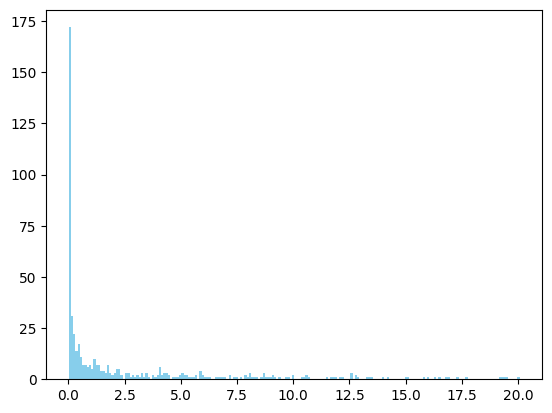

In [4]:
# extract and plot the trials from the trails object
_, _, _ = plt.hist(x, bins=200, color='skyblue')